In [1124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1125]:
train_data = pd.read_csv("https://raw.githubusercontent.com/srivas-divyansh/Spam/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [1126]:
train_data.shape

(7043, 21)

In [1127]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1129]:
train_data.drop(['customerID'], axis=1, inplace=True)

In [1130]:
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [1131]:
train_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [1132]:
train_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [1133]:
total_charges = train_data['TotalCharges']
total_charges = np.array(total_charges)

In [1134]:
valueInt = []
for value in total_charges:
    try:
        a = int(value)
        valueInt.append(a)
    except ValueError:
        pass


In [1135]:
valueInt

[97,
 2962,
 7099,
 1057,
 7107,
 1024,
 273,
 1252,
 531,
 702,
 70,
 4109,
 4264,
 6603,
 865,
 846,
 889,
 1406,
 4063,
 44,
 5812,
 4473,
 38,
 55,
 2145,
 1415,
 5676,
 1442,
 3480,
 85,
 597,
 3266,
 3808,
 2754,
 19,
 5435,
 3608,
 80,
 417,
 2964,
 1519,
 5817,
 5023,
 20,
 7616,
 62,
 5598,
 3077,
 1782,
 2823,
 267,
 2193,
 2001,
 1916,
 413,
 2066,
 713,
 6253,
 1611,
 941,
 3196,
 3532,
 3778,
 7544,
 1281,
 579,
 5985,
 1290,
 1554,
 553,
 76,
 4039,
 281,
 2265,
 145,
 475,
 3384,
 3770,
 943,
 5832,
 280,
 4720,
 5931,
 45,
 1083,
 3252,
 171,
 4563,
 21,
 150,
 1259,
 1184,
 6404,
 4065,
 5594,
 2931,
 242,
 3157,
 3092,
 4528,
 313,
 1309,
 740,
 1010,
 4965,
 3410,
 2067,
 1185,
 3467,
 6465,
 201,
 1072,
 926,
 715,
 1753,
 4003,
 525,
 600,
 8405,
 44,
 3297,
 1887,
 6733,
 208,
 4135,
 688,
 3297,
 1315,
 6890,
 790,
 4765,
 71,
 4667,
 2095,
 25,
 5186,
 219,
 1640,
 122,
 431,
 1033,
 307,
 3527,
 3632,
 52,
 4068,
 3439,
 799,
 3653,
 454,
 438,
 2364,
 4834,
 7

In [1136]:
valueInt = np.array(valueInt)
valueInt = valueInt.astype('float')

In [1137]:
valueInt

array([  97., 2962., 7099., 1057., 7107., 1024.,  273., 1252.,  531.,
        702.,   70., 4109., 4264., 6603.,  865.,  846.,  889., 1406.,
       4063.,   44., 5812., 4473.,   38.,   55., 2145., 1415., 5676.,
       1442., 3480.,   85.,  597., 3266., 3808., 2754.,   19., 5435.,
       3608.,   80.,  417., 2964., 1519., 5817., 5023.,   20., 7616.,
         62., 5598., 3077., 1782., 2823.,  267., 2193., 2001., 1916.,
        413., 2066.,  713., 6253., 1611.,  941., 3196., 3532., 3778.,
       7544., 1281.,  579., 5985., 1290., 1554.,  553.,   76., 4039.,
        281., 2265.,  145.,  475., 3384., 3770.,  943., 5832.,  280.,
       4720., 5931.,   45., 1083., 3252.,  171., 4563.,   21.,  150.,
       1259., 1184., 6404., 4065., 5594., 2931.,  242., 3157., 3092.,
       4528.,  313., 1309.,  740., 1010., 4965., 3410., 2067., 1185.,
       3467., 6465.,  201., 1072.,  926.,  715., 1753., 4003.,  525.,
        600., 8405.,   44., 3297., 1887., 6733.,  208., 4135.,  688.,
       3297., 1315.,

In [1138]:
final_total_charges = []
index = 0
for value in total_charges:
    try:
        a = float(value)
        final_total_charges.append(a)
    except ValueError:
        final_total_charges.append(valueInt[index])
        index += 1

In [1139]:
final_total_charges = np.array(final_total_charges)
final_total_charges

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [1140]:
train_data['TotalCharges'] = final_total_charges

In [1141]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [1142]:
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [1143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1144]:
train_data['gender'] = le.fit_transform(train_data['gender'])
train_data['Partner'] = le.fit_transform(train_data['Partner'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])
train_data['PhoneService'] = le.fit_transform(train_data['PhoneService'])
train_data['MultipleLines'] = le.fit_transform(train_data['MultipleLines'])
train_data['InternetService'] = le.fit_transform(train_data['InternetService'])
train_data['OnlineSecurity'] = le.fit_transform(train_data['OnlineSecurity'])
train_data['OnlineBackup'] = le.fit_transform(train_data['OnlineBackup'])
train_data['DeviceProtection'] = le.fit_transform(train_data['gender'])
train_data['StreamingMovies'] = le.fit_transform(train_data['StreamingMovies'])
train_data['PaperlessBilling'] = le.fit_transform(train_data['PaperlessBilling'])
train_data['TechSupport'] = le.fit_transform(train_data['TechSupport'])
train_data['StreamingTV'] = le.fit_transform(train_data['StreamingTV'])
train_data['Churn'] = le.fit_transform(train_data['Churn'])
train_data['Contract'] = le.fit_transform(train_data['Contract'])
train_data['PaymentMethod'] = le.fit_transform(train_data['PaymentMethod'])

In [1145]:
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,1,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,1,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,1,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,0,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,1,0,0,0,0,1,3,74.40,306.60,1


In [1146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [1147]:
print(train_data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [1148]:
train_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,1.000000,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000741,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.001874,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102377,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,-0.001808,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318503,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.010517,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064190,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.005106,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824198,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,-0.006488,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112122,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,-0.006739,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.451871,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,-0.000863,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.176161,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,-0.015017,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254513,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,-0.012057,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375548,-0.195525


In [1149]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [1150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [1151]:
X = train_data.drop('Churn', axis=1)
y = train_data['Churn']

In [1152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [1153]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.008016,-0.002754,0.002003,0.000825,-0.003909,-0.020007,0.002424,-0.003629,-0.006743,1.000000,-0.008178,-0.004560,-0.014600,0.002131,-0.018600,0.022465,-0.013792,-0.002890
SeniorCitizen,-0.008016,1.000000,0.013490,-0.208703,0.013813,0.008455,0.134970,-0.039730,-0.130814,-0.010104,-0.008016,-0.140264,0.024373,0.049105,-0.141525,0.150013,-0.045414,0.213791,0.097711
Partner,-0.002754,0.013490,1.000000,0.447542,0.381660,0.012921,0.130365,0.000411,0.149066,0.154893,-0.002754,0.132944,0.135979,0.128608,0.301794,-0.018378,-0.160743,0.085024,0.311430
Dependents,0.002003,-0.208703,0.447542,1.000000,0.162957,0.001507,-0.030531,0.056029,0.148697,0.096197,0.002003,0.131362,0.055722,0.017009,0.243098,-0.117014,-0.041421,-0.123299,0.059113
tenure,0.000825,0.013813,0.381660,0.162957,1.000000,0.002673,0.338667,-0.039486,0.328013,0.366073,0.000825,0.325617,0.287372,0.293012,0.677541,0.001591,-0.374922,0.248034,0.825714
PhoneService,-0.003909,0.008455,0.012921,0.001507,0.002673,1.000000,-0.022612,0.384921,-0.010448,0.008460,-0.003909,-0.018557,0.055822,0.047643,-0.002155,0.013451,-0.003935,0.247264,0.108422
MultipleLines,-0.020007,0.134970,0.130365,-0.030531,0.338667,-0.022612,1.000000,-0.117866,0.003387,0.110716,-0.020007,0.017496,0.178523,0.187113,0.110542,0.161653,-0.172308,0.434942,0.450347
InternetService,0.002424,-0.039730,0.000411,0.056029,-0.039486,0.384921,-0.117866,1.000000,-0.027812,0.029481,0.002424,-0.022741,0.116003,0.102212,0.089117,-0.129584,0.080208,-0.320848,-0.180039
OnlineSecurity,-0.003629,-0.130814,0.149066,0.148697,0.328013,-0.010448,0.003387,-0.027812,1.000000,0.183130,-0.003629,0.286883,0.047262,0.055403,0.378495,-0.168815,-0.100661,-0.053376,0.257859
OnlineBackup,-0.006743,-0.010104,0.154893,0.096197,0.366073,0.008460,0.110716,0.029481,0.183130,1.000000,-0.006743,0.199172,0.145312,0.137571,0.284953,-0.023903,-0.130517,0.110515,0.365759


In [1154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6911 to 5963
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   MultipleLines     5634 non-null   int64  
 7   InternetService   5634 non-null   int64  
 8   OnlineSecurity    5634 non-null   int64  
 9   OnlineBackup      5634 non-null   int64  
 10  DeviceProtection  5634 non-null   int64  
 11  TechSupport       5634 non-null   int64  
 12  StreamingTV       5634 non-null   int64  
 13  StreamingMovies   5634 non-null   int64  
 14  Contract          5634 non-null   int64  
 15  PaperlessBilling  5634 non-null   int64  
 16  PaymentMethod     5634 non-null   int64

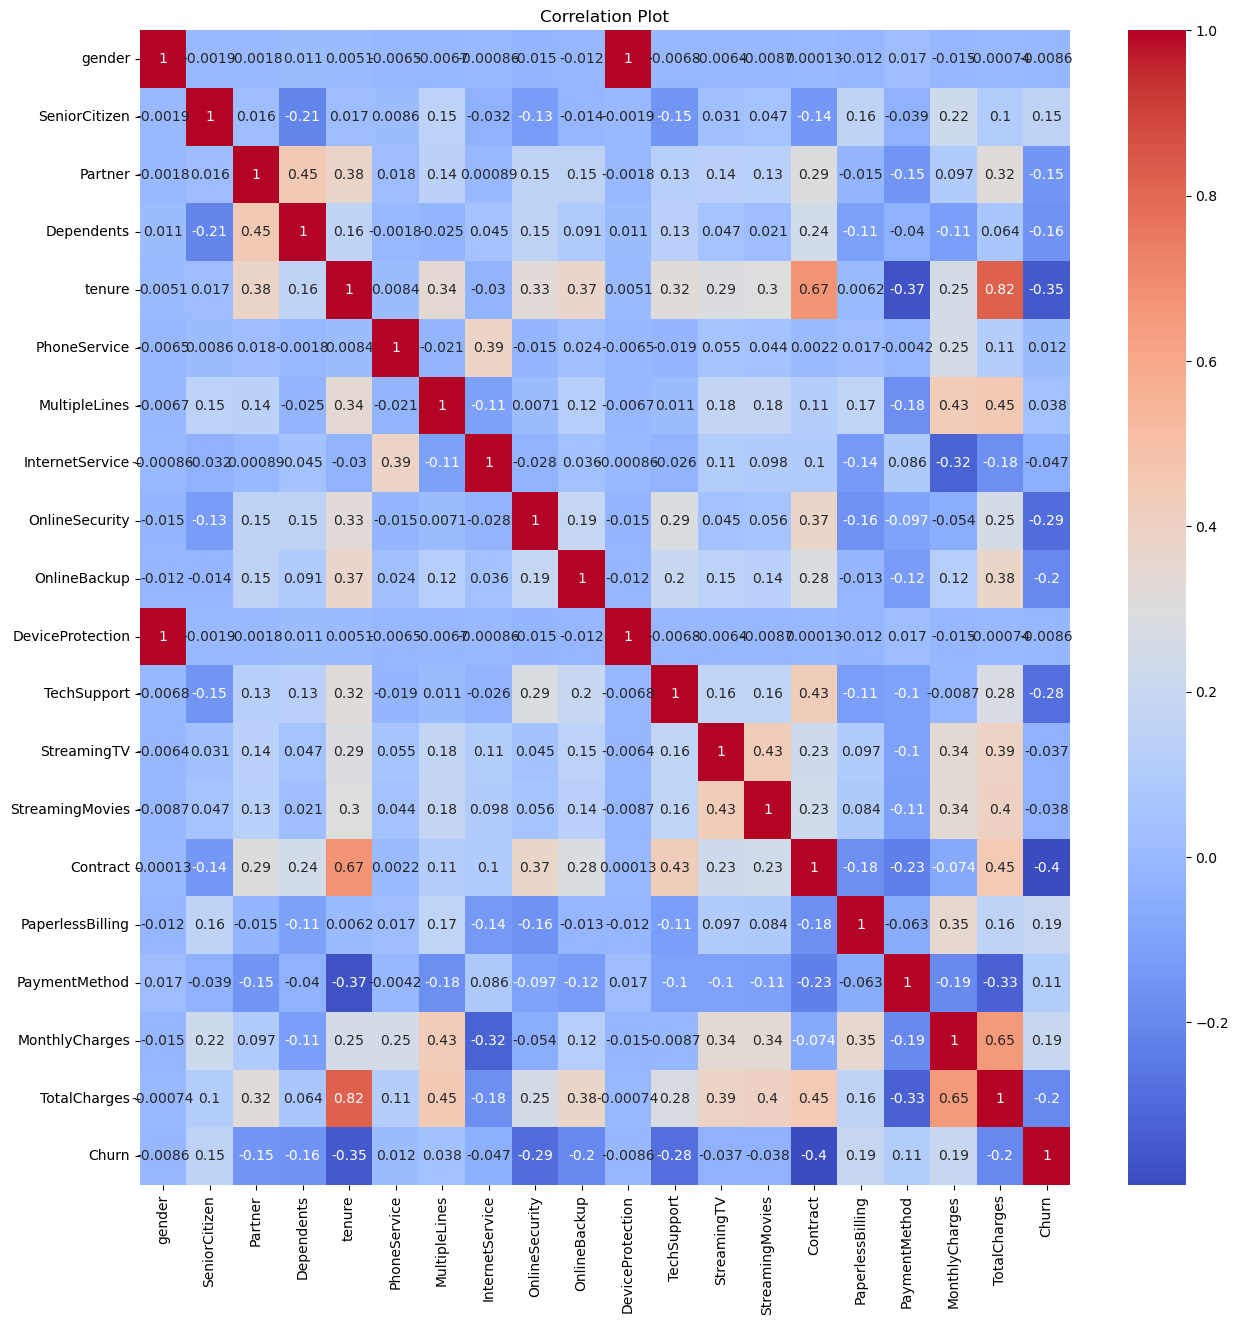

In [1155]:
plt.figure(figsize=(15, 15))

sns.heatmap(train_data.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Plot')
plt.show()

In [1156]:
X_train = X_train.drop('DeviceProtection', axis=1)
X_test = X_test.drop('DeviceProtection', axis=1)

In [1157]:
X_train.shape

(5634, 18)

In [1158]:
pca = PCA(n_components=6)
pca_test = PCA(n_components=6)

In [1159]:
# x_train_pca = X_train.drop(['MonthlyCharges','TotalCharges'], axis=1)
# x_test_pca = X_test.drop(['MonthlyCharges','TotalCharges'], axis=1)
pca.fit(X_train)
pca_test.fit(X_test)

PCA(n_components=6)

In [1160]:
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=6)

In [1161]:
x_pca = pca.transform(X_train)
x_pca_test = pca_test.transform(X_test)

In [1162]:
x_pca_test.shape

(1409, 6)

In [1163]:
x_pca

array([[-1.19503427e+03, -4.65639557e+01, -1.67662339e+01,
         1.11472194e-02, -1.44281380e+00, -2.60387708e-01],
       [ 5.86996732e+03,  7.50370958e+00,  1.29243035e+01,
         6.44907466e-01, -4.90896500e-01,  6.44793263e-01],
       [ 1.73497700e+03,  7.01656523e+00, -2.44419042e+00,
        -1.56991177e-01,  1.13720168e+00, -8.65911738e-01],
       ...,
       [ 1.13573711e+03,  2.20157924e+01, -2.37925029e+00,
         1.97764034e-01,  6.16629323e-01, -1.35209991e-01],
       [ 7.95603580e+02,  1.57230797e+01, -3.80005649e+00,
         4.04461602e-01,  4.30918767e-01,  4.41103871e-01],
       [-6.18838318e+02,  1.92514970e+01, -4.10026420e+00,
         1.83848860e+00,  3.38935635e-01, -1.43317761e-01]])

In [1164]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5
0,-1195.034267,-46.563956,-16.766234,0.011147,-1.442814,-0.260388
1,5869.967316,7.503710,12.924304,0.644907,-0.490896,0.644793
2,1734.976998,7.016565,-2.444190,-0.156991,1.137202,-0.865912
3,-1877.386138,-29.011850,5.712071,-0.261017,-2.025851,-0.344269
4,-1021.297798,19.650436,-1.671660,-2.258340,-0.487642,-1.001143
...,...,...,...,...,...,...
5629,1787.384008,-27.551365,-9.612604,-1.905271,-0.072284,1.331144
5630,-1943.687574,38.495073,-6.671881,0.083395,0.235031,-0.847165
5631,1135.737113,22.015792,-2.379250,0.197764,0.616629,-0.135210
5632,795.603580,15.723080,-3.800056,0.404462,0.430919,0.441104


In [1165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 6911 to 5963
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   MultipleLines     5634 non-null   int64  
 7   InternetService   5634 non-null   int64  
 8   OnlineSecurity    5634 non-null   int64  
 9   OnlineBackup      5634 non-null   int64  
 10  TechSupport       5634 non-null   int64  
 11  StreamingTV       5634 non-null   int64  
 12  StreamingMovies   5634 non-null   int64  
 13  Contract          5634 non-null   int64  
 14  PaperlessBilling  5634 non-null   int64  
 15  PaymentMethod     5634 non-null   int64  
 16  MonthlyCharges    5634 non-null   float

In [1166]:
X_train = pd.DataFrame(x_pca)
X_test = pd.DataFrame(x_pca_test)

In [1167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans



In [1168]:
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

classifier_random = RandomForestClassifier()
classifier_random.fit(X_train, y_train)

RandomForestClassifier()

In [1169]:
y_pred_lg = classifier_logistic.predict(X_test)
print(classifier_logistic.score(X_test, y_test)*100)

y_pred_knn = classifier_knn.predict(X_test)
print(classifier_knn.score(X_test, y_test)*100)

y_pred_svm = classifier_svm.predict(X_test)
print(classifier_svm.score(X_test, y_test)*100)

y_pred_nb = classifier_nb.predict(X_test)
print(classifier_nb.score(X_test, y_test)*100)

y_pred_rf = classifier_random.predict(X_test)
print(classifier_random.score(X_test, y_test)*100)


79.347054648687
76.08232789212207
74.02413058907025
77.00496806245565
77.78566359119942


In [ ]:
import joblib
my_model = classifier_logistic
joblib.dump(my_model, 'model.joblib')